In [1]:
#### Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning and Manipulation

## Loading Dataset

In [2]:
df = pd.read_csv("C:/Users/Naznin Naznin/Lending Club Case Study/loan.csv")

C:\Users\Naznin Naznin\AppData\Local\Temp\ipykernel_23640\1001476222.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Naznin Naznin/Lending Club Case Study/loan.csv")


In [3]:
df.shape

(39717, 111)

### Dataset Description

In [4]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## Data Cleaning

### Removing columns with same values

#### First we decided to remove null columns

In [5]:
all_null_columns = df.columns[df.isnull().all()]

In [6]:
len(all_null_columns)

54

In [7]:
df[all_null_columns]

,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop(all_null_columns, axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Removing colomns with only one value
Later we realised that a lot of columns just have one values and they don't serve any purpose in this analysis.

In [10]:
df_samevalue_col = [col for col in df.columns if df[col].nunique()==1]
len(df_samevalue_col)

9

In [11]:
df[df_samevalue_col]

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
39712,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39713,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39714,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39715,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN


In [12]:
df_samevalue_col = [col for col in df.columns if df[col].nunique()==1]
df = df.drop(columns = df_samevalue_col)
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [13]:
df.shape

(39717, 48)

In [14]:
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


In [15]:
missing_values_col_50 = list(df.columns[df.isna().sum()/ len(df) * 100 > 50])
missing_values_col_50

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [16]:
df.drop(missing_values_col_50, axis = 1, inplace = True)

In [17]:
df.columns[df.isna().sum()/ len(df) * 100 != 0]

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [18]:
df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

## Numerical Columns Identification

In [19]:
num_cols = [col for col in df.columns if df[col].dtype != 'O'] 

In [20]:
len(num_cols)

25

In [21]:
df[num_cols]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,162.87,24000.0,27.65,0,1,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,1077430,1314167,2500,2500,2500.0,59.83,30000.0,1.00,0,5,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,1077175,1313524,2400,2400,2400.0,84.33,12252.0,8.72,0,2,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,1076863,1277178,10000,10000,10000.0,339.31,49200.0,20.00,0,1,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
4,1075358,1311748,3000,3000,3000.0,67.79,80000.0,17.94,0,0,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,78.42,110000.0,11.33,0,0,...,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,NaN
39713,90665,90607,8500,8500,875.0,275.38,18000.0,6.40,1,1,...,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,NaN
39714,90395,90390,5000,5000,1325.0,156.84,100000.0,2.30,0,0,...,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,NaN
39715,90376,89243,5000,5000,650.0,155.38,200000.0,3.72,0,0,...,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,NaN


In [22]:
num_cols = [col for col in df.columns if df[col].dtype != 'O'] 
display(num_cols)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'pub_rec_bankruptcies']

## Categorical Columns Identification

In [23]:
#Display the Categorical Columns
cat_cols = [col for col in df.columns if df[col].dtype == 'O'] 
display(cat_cols)

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d']

In [24]:
len(cat_cols)

20

# Categorical Columns Analysis

## Loan Status - Very Important
All other variables will be analysed with this

In [25]:
display(df['loan_status'].value_counts()) #very important

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

## Loan period - Useful and Important

### Univariate Analysis

In [26]:
# Unique value counts for loan status
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [27]:
len(df[df['loan_status'] == 'Charged Off'])/ len(df)

0.14167736737417227

<AxesSubplot:xlabel='loan_status', ylabel='count'>

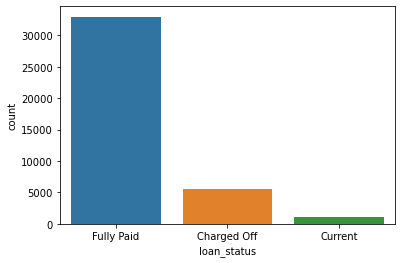

In [28]:
sns.countplot(data = df, x = 'loan_status')

### Bivariate Analysis

#### Group Bar chart for different loan status for both terms

<Figure size 720x432 with 0 Axes>

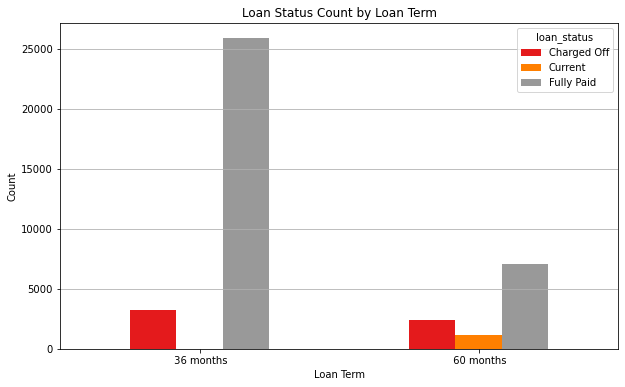

In [29]:
term_status_crosstab = pd.crosstab(df['term'], df['loan_status'])

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
term_status_crosstab.plot(kind='bar', figsize=(10, 6), colormap='Set1')

# Set titles and labels
plt.title('Loan Status Count by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

#### Normalized Stacked Bar Chart
Normalising and visualising makes the ratio easier to compare for both terms.

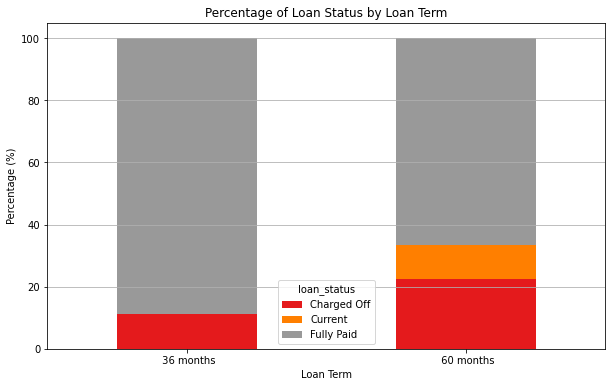

In [30]:
# Normalize the data to get percentages within each term
term_status_crosstab_percent = term_status_crosstab.div(term_status_crosstab.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart for percentage distribution
term_status_crosstab_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set1')

# Set the title and labels
plt.title('Percentage of Loan Status by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

## Grade and Sub Grade - Useful and Important
Analyse grade column  which is risk assessment for grade. It can be used in bivariate analysis.
Sub-Grade is more detailed Grade


### Univariate Analysis


In [31]:
# Counting the unique values.
display(df['grade'].value_counts())
display(df['sub_grade'].value_counts())

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

### Bivariate Analysis of Grade

In [32]:
# Cross-tabulation of grade vs loan_status
grade_crosstab = pd.crosstab(df['grade'], df['loan_status'])
print(grade_crosstab)


loan_status  Charged Off  Current  Fully Paid
grade                                        
A                    602       40        9443
B                   1425      345       10250
C                   1347      264        6487
D                   1118      222        3967
E                    715      179        1948
F                    319       73         657
G                    101       17         198


<Figure size 720x432 with 0 Axes>

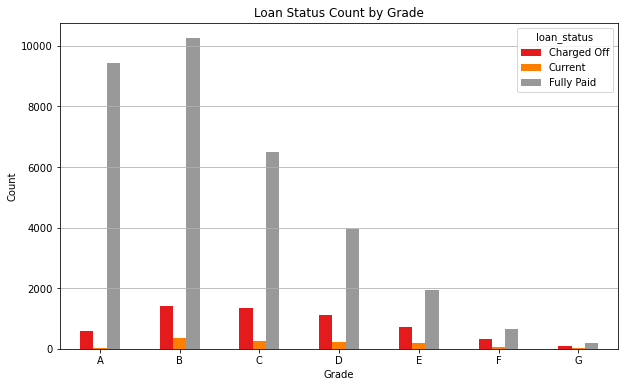

In [33]:

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
grade_crosstab.plot(kind='bar', figsize=(10, 6), colormap='Set1')

# Set titles and labels
plt.title('Loan Status Count by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

#### Normalization for better comparison

In [34]:
# Normalise for better comparison
grade_crosstab_percent = pd.crosstab(df['grade'], df['loan_status'], normalize='index') * 100
print(grade_crosstab_percent)

loan_status  Charged Off   Current  Fully Paid
grade                                         
A               5.969261  0.396629   93.634110
B              11.855241  2.870216   85.274542
C              16.633737  3.260064   80.106199
D              21.066516  4.183154   74.750330
E              25.158339  6.298381   68.543279
F              30.409914  6.959009   62.631077
G              31.962025  5.379747   62.658228


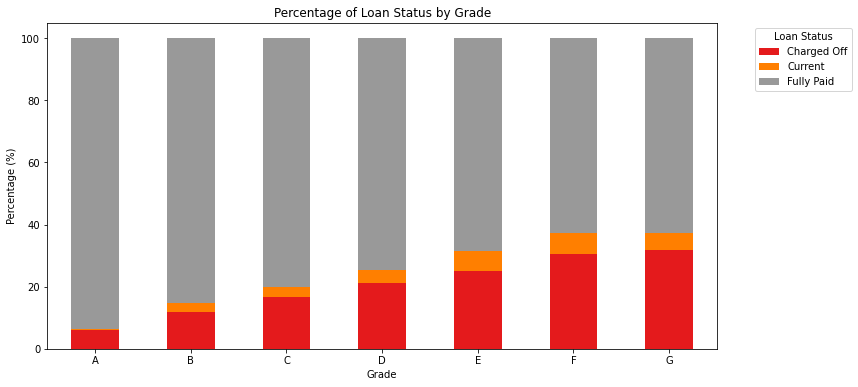

In [35]:
# Plotting the stacked bar chart
grade_crosstab_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set1')

plt.title('Percentage of Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Bivariate analysis for Sub-Grade
Sub-Grade is more granular metric than Grade

In [36]:
# Cross-tabulation of sub-grade vs loan_status
sub_grade_crosstab = pd.crosstab(df['sub_grade'], df['loan_status'])
print(sub_grade_crosstab)

loan_status  Charged Off  Current  Fully Paid
sub_grade                                    
A1                    30        0        1109
A2                    74        0        1434
A3                   103        0        1707
A4                   178       13        2695
A5                   217       27        2498
B1                   171       33        1626
B2                   228       56        1773
B3                   341       92        2484
B4                   329       75        2108
B5                   356       89        2259
C1                   336       81        1719
C2                   321       80        1610
C3                   270       41        1218
C4                   212       30         994
C5                   208       32         946
D1                   167        0         764
D2                   271       62        1015
D3                   256       57         860
D4                   215       63         703
D5                   209       40 

#### Normalizing for better comparison and visualising as stacked bar graph

In [37]:
# Calculate percentages for better comparison
sub_grade_crosstab_percent = pd.crosstab(df['sub_grade'], df['loan_status'], normalize='index') * 100
print(sub_grade_crosstab_percent)

loan_status  Charged Off    Current  Fully Paid
sub_grade                                      
A1              2.633889   0.000000   97.366111
A2              4.907162   0.000000   95.092838
A3              5.690608   0.000000   94.309392
A4              6.167706   0.450450   93.381843
A5              7.913931   0.984683   91.101386
B1              9.344262   1.803279   88.852459
B2             11.084103   2.722411   86.193486
B3             11.690093   3.153925   85.155982
B4             13.097134   2.985669   83.917197
B5             13.165680   3.291420   83.542899
C1             15.730337   3.792135   80.477528
C2             15.962208   3.978120   80.059672
C3             17.658600   2.681491   79.659908
C4             17.152104   2.427184   80.420712
C5             17.537943   2.698145   79.763912
D1             17.937701   0.000000   82.062299
D2             20.103858   4.599407   75.296736
D3             21.824382   4.859335   73.316283
D4             21.916412   6.422018   71

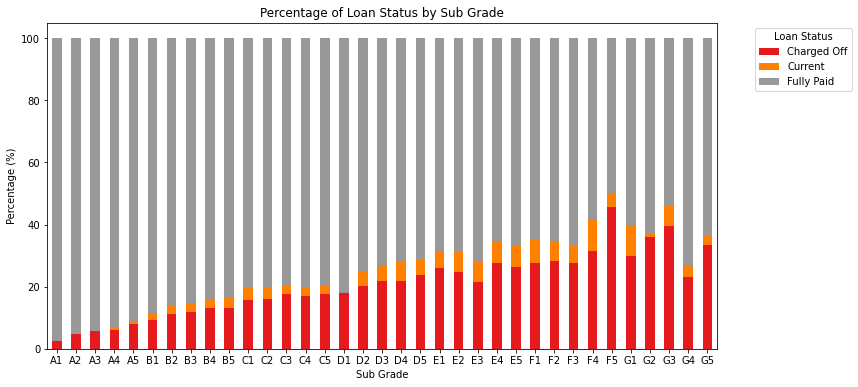

In [38]:
# Plotting the stacked bar chart
sub_grade_crosstab_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set1')

plt.title('Percentage of Loan Status by Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Analysis
Grade Analysis: Provides a broad understanding of risk distribution, confirming that as the grade declines, default rates increase. This is essential for overall loan portfolio management.

Sub-Grade Analysis: Adds valuable detail, allowing for precise identification of specific high-risk areas that would be missed if only the broader grade were considered. Sub-grades help in pinpointing the exact level of risk within each grade category.

## Employer's Title - Not Useful

### Univariate Analysis

In [39]:
display(df['emp_title'].value_counts())

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

### Analysis
Free text values, unable to use it for analysis with current skills. If someone I could categorize employement then it could have been useful.

## Employement Length - Not Useful

### Univariate Analysis
Checking the unique value counts

In [40]:
display(df['emp_length'].value_counts()) #important
ordered_emp_length = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
                      '6 years', '7 years', '8 years', '9 years', '10+ years']




10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

### Bivariate Analysis of Employement Length

In [41]:
emp_length_cross_tab = pd.crosstab(df['emp_length'], df['loan_status'])

ordered_emp_length = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
                      '6 years', '7 years', '8 years', '9 years', '10+ years']
# Reindex the cross-tab to match the desired order
emp_length_cross_tab = emp_length_cross_tab.loc[ordered_emp_length]

# Display the ordered cross-tabulation
print(emp_length_cross_tab)
emp_length_cross_tab_norm = pd.crosstab(df['emp_length'], df['loan_status'], normalize='index')
emp_length_cross_tab_norm = emp_length_cross_tab_norm.loc[ordered_emp_length]
print(emp_length_cross_tab_norm)

loan_status  Charged Off  Current  Fully Paid
emp_length                                   
< 1 year             639       75        3869
1 year               456       71        2713
2 years              567       97        3724
3 years              555       83        3457
4 years              462       94        2880
5 years              458       88        2736
6 years              307       61        1861
7 years              263       62        1448
8 years              203       44        1232
9 years              158       32        1068
10+ years           1331      391        7157
loan_status  Charged Off   Current  Fully Paid
emp_length                                    
< 1 year        0.139428  0.016365    0.844207
1 year          0.140741  0.021914    0.837346
2 years         0.129216  0.022106    0.848678
3 years         0.135531  0.020269    0.844200
4 years         0.134459  0.027357    0.838184
5 years         0.139549  0.026813    0.833638
6 years         0.137730  

#### Visualization of Employment Period using group Bar chart

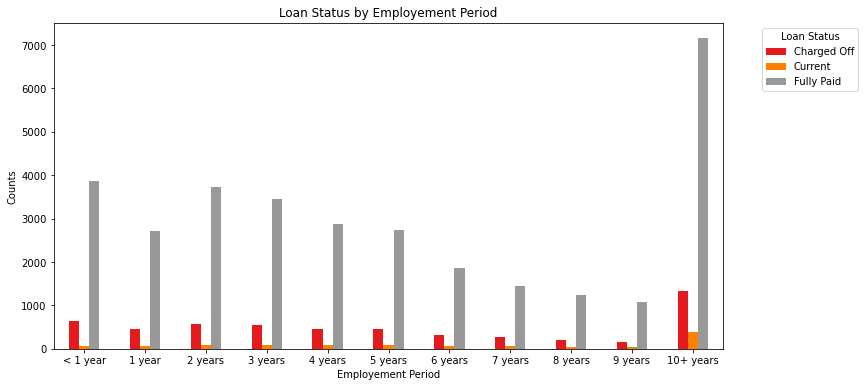

In [42]:
# Plotting the stacked bar chart
emp_length_cross_tab.plot(kind='bar', figsize=(12, 6), colormap='Set1')

plt.title('Loan Status by Employement Period')
plt.xlabel('Employement Period')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Stacked normalized bar chart for better comparison

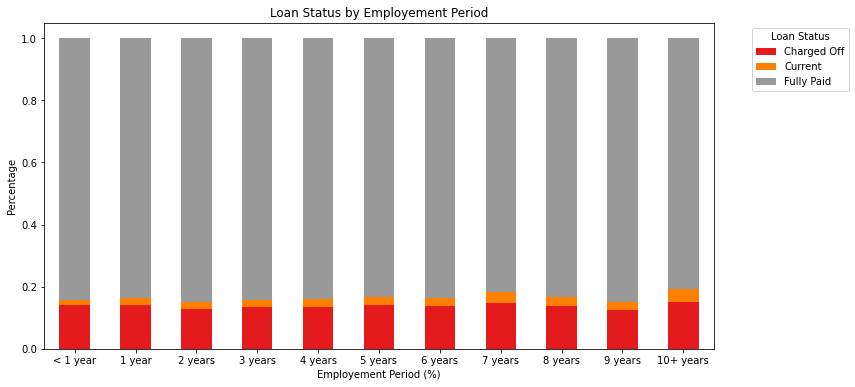

In [43]:
# Plotting the stacked bar chart
emp_length_cross_tab_norm.plot(kind='bar', stacked = True, figsize=(12, 6), colormap='Set1')

plt.title('Loan Status by Employement Period')
plt.xlabel('Employement Period (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Analysis
No Significant trend seen.

## Home Ownership - Useful

### Univariate Analysis
Counting the unique values.

In [44]:
display(df['home_ownership'].value_counts()) #important

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

### Bivariate Analysis of Home Ownership

In [45]:
home_ownership_cross_tab_norm = pd.crosstab(df['home_ownership'], df['loan_status'], normalize='index')
ordered_home_ownership = ['NONE','RENT', 'MORTGAGE','OWN']
# Reindex the cross-tab to match the desired order
home_ownership_cross_tab_norm = home_ownership_cross_tab_norm.loc[ordered_home_ownership]
print(home_ownership_cross_tab_norm)

loan_status     Charged Off   Current  Fully Paid
home_ownership                                   
NONE               0.000000  0.000000    1.000000
RENT               0.150220  0.022170    0.827610
MORTGAGE           0.131774  0.036129    0.832097
OWN                0.144866  0.027142    0.827992


#### Visualization of Employment Period using group Bar chart

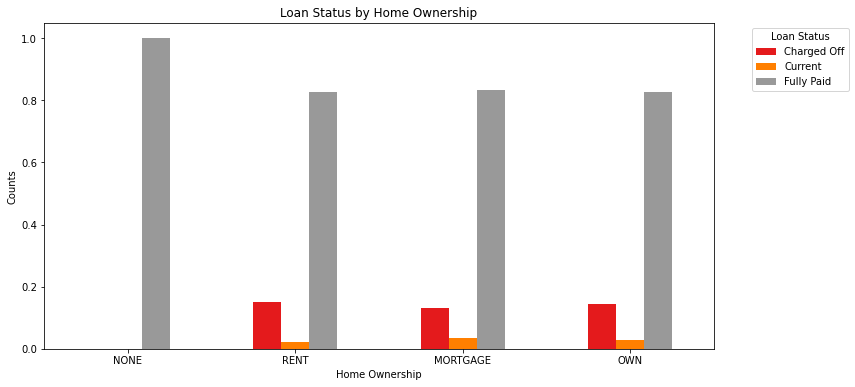

In [46]:
# Plotting the stacked bar chart
home_ownership_cross_tab_norm.plot(kind='bar', figsize=(12, 6), colormap='Set1')

plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Stacked normalized bar chart for better comparison

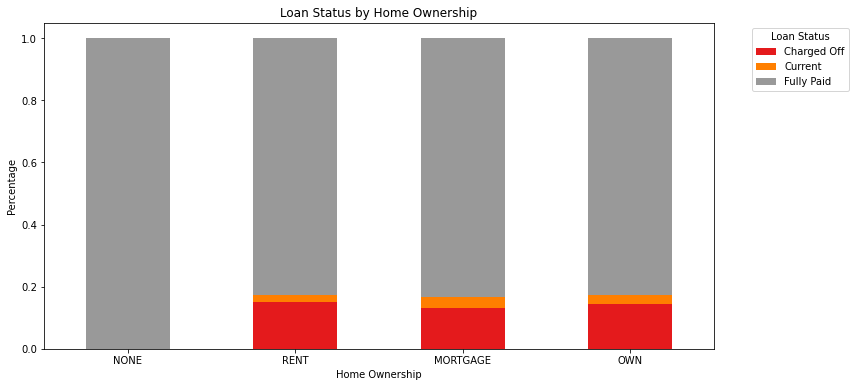

In [47]:
# Plotting the stacked bar chart
home_ownership_cross_tab_norm.plot(kind='bar', stacked = True, figsize=(12, 6), colormap='Set1')

plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Analysis
People with mortgage had lesser chance of defaulting as seen in the data.

## Verification Status - Useful

### Univariate Analysis
Counting the unique rows

In [48]:
display(df['verification_status'].value_counts()) #important

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [49]:
verification_status_cross_tab_norm = pd.crosstab(df['verification_status'], df['loan_status'], normalize='index')
display(verification_status_cross_tab_norm)

loan_status,Charged Off,Current,Fully Paid
verification_status,,,
Not Verified,0.126588,0.013415,0.859996
Source Verified,0.143587,0.031040,0.825373
Verified,0.160122,0.047076,0.792802


In [50]:
#### Stacked normalized bar chart for comparison

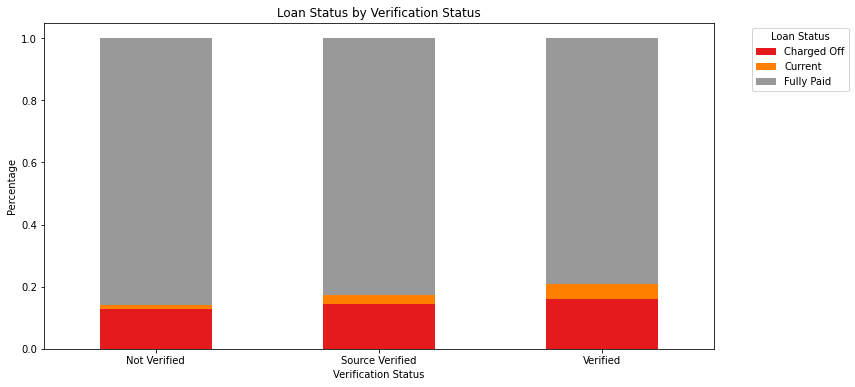

In [51]:
# Plotting the stacked bar chart
verification_status_cross_tab_norm.plot(kind='bar', stacked = True, figsize=(12, 6), colormap='Set1')

plt.title('Loan Status by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Analysis
It seems very counter intuitive but not verified income had significantly less percentage of charge offs than verified.

## Missed Payments in Last 2 years - Not Useful

### Univariate Analysis

In [52]:
display(df['delinq_2yrs'].value_counts())

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

### Bivariate Analysis

In [53]:
delinq_2yrs_cross_tab = pd.crosstab(df['delinq_2yrs'], df['loan_status'])
display(delinq_2yrs_cross_tab)

loan_status,Charged Off,Current,Fully Paid
delinq_2yrs,,,
0,4936,1019,29450
1,507,96,2700
2,130,14,543
3,35,8,177
4,13,2,47
5,3,1,18
6,1,0,9
7,1,0,3
8,1,0,1


In [54]:
delinq_2yrs_cross_tab_norm = pd.crosstab(df['delinq_2yrs'], df['loan_status'], normalize='index')
display(delinq_2yrs_cross_tab_norm)

loan_status,Charged Off,Current,Fully Paid
delinq_2yrs,,,
0,0.139415,0.028781,0.831803
1,0.153497,0.029064,0.817439
2,0.189229,0.020378,0.790393
3,0.159091,0.036364,0.804545
4,0.209677,0.032258,0.758065
5,0.136364,0.045455,0.818182
6,0.100000,0.000000,0.900000
7,0.250000,0.000000,0.750000
8,0.500000,0.000000,0.500000


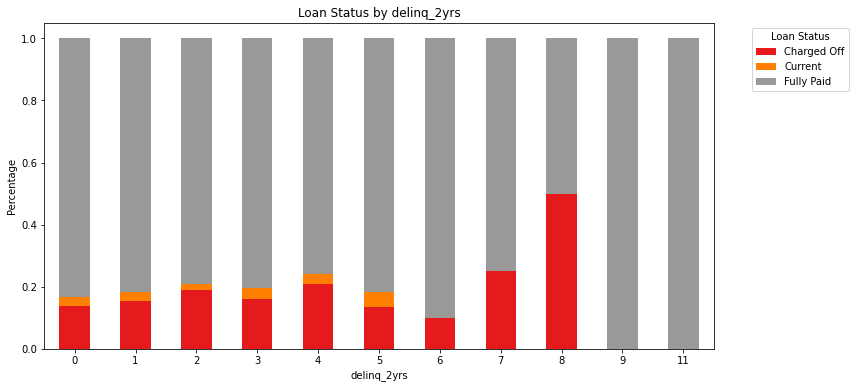

In [55]:
# Plotting the stacked bar chart
delinq_2yrs_cross_tab_norm.plot(kind='bar', stacked = True, figsize=(12, 6), colormap='Set1')

plt.title('Loan Status by delinq_2yrs')
plt.xlabel('delinq_2yrs')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insight

There is not enough data to compare after 4 delinq, and should be taken with a grain of salt. Until 4 stead increase in trend is seen with 3 being an exception. So logically higher delinq can be consider as a factor for defaulting.

## Credit Inquiries in Last 6 Months - Not Useful

Univariate Analysis

In [56]:
display(df['inq_last_6mths'].value_counts())

0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: inq_last_6mths, dtype: int64

### Bivariate Analysis

In [57]:
inq_last_6mths_cross_tab = pd.crosstab(df['inq_last_6mths'], df['loan_status'])
display(inq_last_6mths_cross_tab)

loan_status,Charged Off,Current,Fully Paid
inq_last_6mths,,,
0,2280,591,16429
1,1677,311,8983
2,943,158,4711
3,619,65,2364
4,51,10,265
5,28,2,116
6,16,1,47
7,10,1,24
8,3,1,11


In [58]:
inq_last_6mths_cross_tab_norm = pd.crosstab(df['inq_last_6mths'], df['loan_status'], normalize='index')
display(inq_last_6mths_cross_tab_norm)

loan_status,Charged Off,Current,Fully Paid
inq_last_6mths,,,
0,0.118135,0.030622,0.851244
1,0.152858,0.028347,0.818795
2,0.162251,0.027185,0.810564
3,0.203084,0.021325,0.775591
4,0.156442,0.030675,0.812883
5,0.191781,0.013699,0.794521
6,0.250000,0.015625,0.734375
7,0.285714,0.028571,0.685714
8,0.200000,0.066667,0.733333


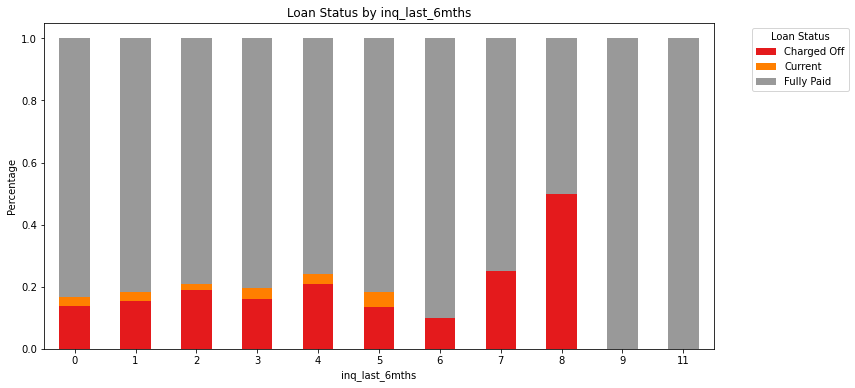

In [59]:
# Plotting the stacked bar chart
delinq_2yrs_cross_tab_norm.plot(kind='bar', stacked = True, figsize=(12, 6), colormap='Set1')

plt.title('Loan Status by inq_last_6mths')
plt.xlabel('inq_last_6mths')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insight
No strong trend is seen. for concrete analysis

## Purpose - Useful

### Univariate Anlaysis

In [60]:
display(df['purpose'].value_counts()) #very important

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [61]:
len(df[(df['purpose'] == 'debt_consolidation') | (df['purpose'] == 'credit_card')])/len(df) * 100

59.85094543898079

### Bivariate Analysis

In [62]:
purpose_cross_tab_norm = pd.crosstab(df['purpose'], df['loan_status'], normalize='index')
display(purpose_cross_tab_norm)

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,0.103292,0.032279,0.864429
credit_card,0.105653,0.020078,0.874269
debt_consolidation,0.148436,0.031436,0.820128
educational,0.172308,0.000000,0.827692
home_improvement,0.116599,0.033938,0.849462
house,0.154856,0.036745,0.808399
major_purchase,0.101509,0.016918,0.881573
medical,0.152958,0.017316,0.829726
moving,0.157804,0.012007,0.830189


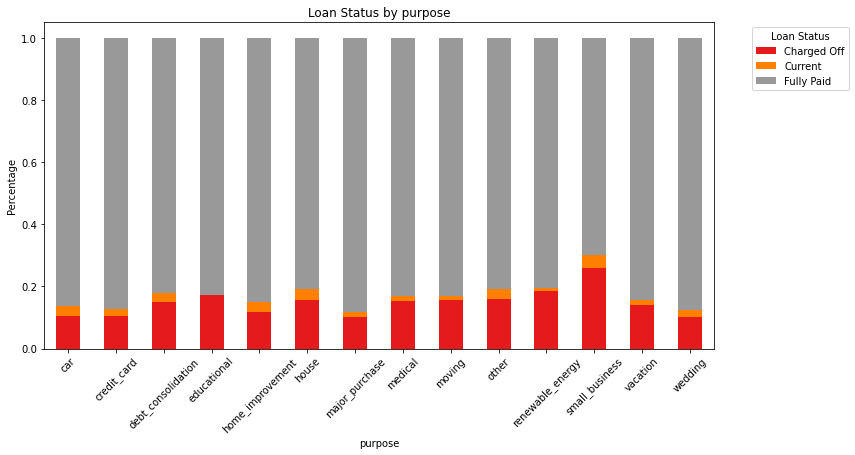

In [63]:
# Plotting the stacked bar chart
purpose_cross_tab_norm.plot(kind='bar', stacked = True, figsize=(12, 6), colormap='Set1')

plt.title('Loan Status by purpose')
plt.xlabel('purpose')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights
We can see small business are significantly more probable to default. See others to gain more insight

## Zip Code - Useful

### Univariate Analysis

In [64]:
display(df['zip_code'].value_counts().head(90)) #useful 


100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
115xx    119
337xx    118
930xx    118
840xx    118
302xx    118
Name: zip_code, Length: 90, dtype: int64

### Bivariate Analysis

In [65]:
# Cross-tabulate the counts of loan statuses by zip code
zip_status_counts = pd.crosstab(df['zip_code'], df['loan_status'])

# Filter out zip codes with less than 50 total data points
zip_status_counts = zip_status_counts[zip_status_counts.sum(axis=1) >= 50]

# Calculate the default rate for each zip code (percentage of 'Charged Off')
zip_status_counts['default_rate'] = (zip_status_counts['Charged Off'] / 
                                     zip_status_counts.sum(axis=1)) * 100


# View categorized zip codes
print(zip_status_counts[['default_rate']].sort_values(by='default_rate', ascending=False).head(40))


loan_status  default_rate
zip_code                 
935xx           32.673267
986xx           26.785714
206xx           26.229508
082xx           25.490196
891xx           25.098039
283xx           24.528302
906xx           24.074074
890xx           24.060150
321xx           23.880597
349xx           23.880597
937xx           23.529412
641xx           23.423423
325xx           23.255814
984xx           22.580645
927xx           22.388060
907xx           22.131148
302xx           22.033898
974xx           21.875000
983xx           21.875000
633xx           21.666667
065xx           20.754717
305xx           20.481928
347xx           20.408163
917xx           20.402299
914xx           20.338983
333xx           20.121951
207xx           20.111732
331xx           20.057307
488xx           20.000000
751xx           20.000000
290xx           20.000000
330xx           20.000000
925xx           19.831224
871xx           19.780220
959xx           19.753086
339xx           19.672131
346xx       

### Insight
Zipcodes with rate above 20 in the above list have high default rate and also have sufficient data points to make the assumption.

## State - Useful

### Univariate Analysis

In [66]:
display(df['addr_state'].value_counts()) #useful 

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

### Bivariate Analysis

In [67]:

# Cross-tabulate the counts of loan statuses by addr_state
state_status_counts = pd.crosstab(df['addr_state'], df['loan_status'])

# Filter out states with less than 50 total data points
state_status_counts = state_status_counts[state_status_counts.sum(axis=1) >= 50]

# Calculate the default rate for each state (percentage of 'Charged Off')
state_status_counts['default_rate'] = (state_status_counts['Charged Off'] / 
                                       state_status_counts.sum(axis=1)) * 100

# Display the states sorted by default rate
print(state_status_counts[['default_rate']].sort_values(by='default_rate', ascending=False).head(10))


loan_status  default_rate
addr_state               
NV              21.730382
AK              18.750000
SD              18.750000
FL              17.585485
MO              16.618076
HI              16.091954
NM              15.873016
CA              15.847302
OR              15.742794
UT              15.503876


### Insight
NV, AK, SD, FL have particularly high default rate than others (Among all states with datapoints more than 50)

# Numerical Variable Analysis

## Loan Amount - Useful

### Univariate Analysis

C:\Users\Naznin Naznin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

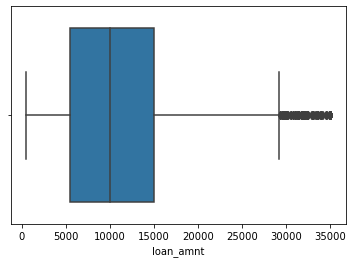

In [68]:
# Box Plot analysis
sns.boxplot(df['loan_amnt'])

In [69]:
q1 = np.percentile(df['loan_amnt'], 25)
q3 = np.percentile(df['loan_amnt'], 75)
iqr = q3 - q1

In [70]:
df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [71]:
upper_limit = q3 + 1.5 * iqr
upper_limit

29250.0

In [72]:
df[df['loan_amnt'] > upper_limit]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
31,1069539,1304608,31825,31825,31825.00000,36 months,7.90%,995.82,A,A4,...,34886.91,31825.00,3061.91,0.0,0.0,0.0,Aug-13,16966.70,Feb-16,0.0
80,1068994,1303432,35000,22075,22050.00000,60 months,17.27%,551.84,D,D3,...,28854.39,22075.00,6812.10,0.0,0.0,0.0,Feb-14,15660.22,Feb-14,0.0
128,1068159,1302729,35000,35000,35000.00000,36 months,8.90%,1111.37,A,A5,...,40009.01,35000.00,5009.01,0.0,0.0,0.0,Jan-15,1123.85,Mar-16,0.0
185,1067084,1301459,35000,35000,35000.00000,36 months,10.65%,1140.07,B,B2,...,38061.50,35000.00,3061.50,0.0,0.0,0.0,Oct-13,272.59,Sep-13,0.0
209,1066706,1300906,29500,29500,28513.45925,60 months,20.30%,786.51,E,E5,...,43294.39,29500.00,16255.23,0.0,0.0,0.0,Oct-15,9781.44,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19800,669297,855767,32000,32000,31684.89912,60 months,20.85%,863.01,G,G3,...,43592.80,32000.01,12455.79,0.0,0.0,0.0,Apr-13,22899.00,Apr-13,0.0
19811,666337,851924,32000,32000,31569.14450,60 months,19.74%,843.19,F,F5,...,49420.35,31961.81,18551.71,0.0,0.0,0.0,Feb-16,842.34,May-16,1.0
19825,668841,855204,30000,30000,29094.62328,60 months,16.40%,735.94,E,E1,...,35520.01,30000.00,6942.91,0.0,0.0,0.0,Feb-13,11730.77,Apr-16,0.0
19838,668594,854847,30000,30000,30000.00000,60 months,17.88%,759.85,E,E5,...,45590.59,29999.99,15590.60,0.0,0.0,0.0,Feb-16,759.45,Apr-16,0.0


#### Checking validity of outliers
Outliers seemed legit and will be used in the analysis

In [73]:
outliers = df[df['loan_amnt'] > df['loan_amnt'].quantile(0.95)]  # Adjust threshold as needed
print(outliers[['loan_amnt', 'grade', 'loan_status']]) ##checking outliers legitimccy


       loan_amnt grade  loan_status
31         31825     A   Fully Paid
51         25600     B   Fully Paid
80         35000     D   Fully Paid
112        26800     F   Fully Paid
124        28000     E  Charged Off
...          ...   ...          ...
19800      32000     G   Fully Paid
19811      32000     F   Fully Paid
19825      30000     E   Fully Paid
19838      30000     E   Fully Paid
19857      35000     G   Fully Paid

[1613 rows x 3 columns]


### Bivariate Analysis of Loan Amount

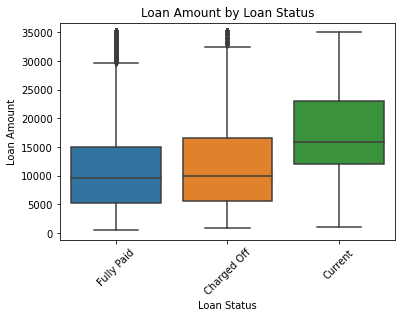

In [74]:
# Create a boxplot to compare dti across different loan statuses
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

#### KDE Plot for finding cutoff values and probability analysis

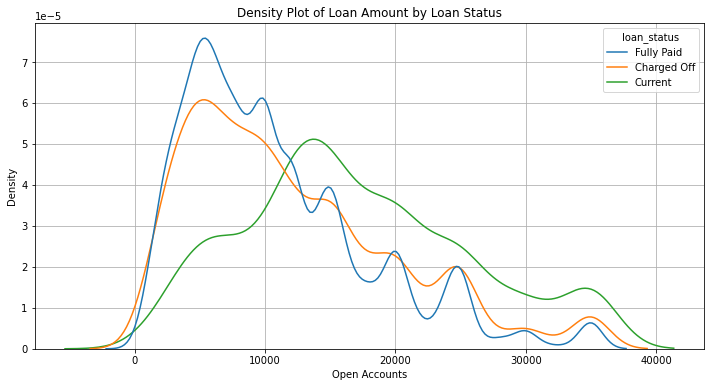

In [75]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='loan_amnt', hue='loan_status', common_norm=False)
plt.title('Density Plot of Loan Amount by Loan Status')
plt.xlabel('Open Accounts')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Insight
Around 15000 loan amount the probability of defaulting increases


## Issue Date - Useful

### Univariate Analysis

In [76]:

# Convert 'issue_d' to datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Display the first few rows to confirm the conversion
print(df['issue_d'].head())
status_counts = df.groupby([df.index, 'loan_status']).size().unstack(fill_value=0)


0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]


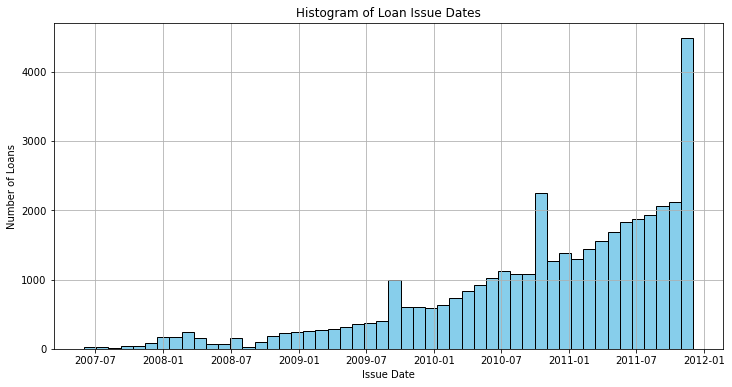

In [77]:
# Plot a histogram of the loan issue dates
plt.figure(figsize=(12, 6))
plt.hist(df['issue_d'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Loan Issue Dates')
plt.xlabel('Issue Date')
plt.ylabel('Number of Loans')
plt.grid(True)
plt.show()

### Bivariate Analysis


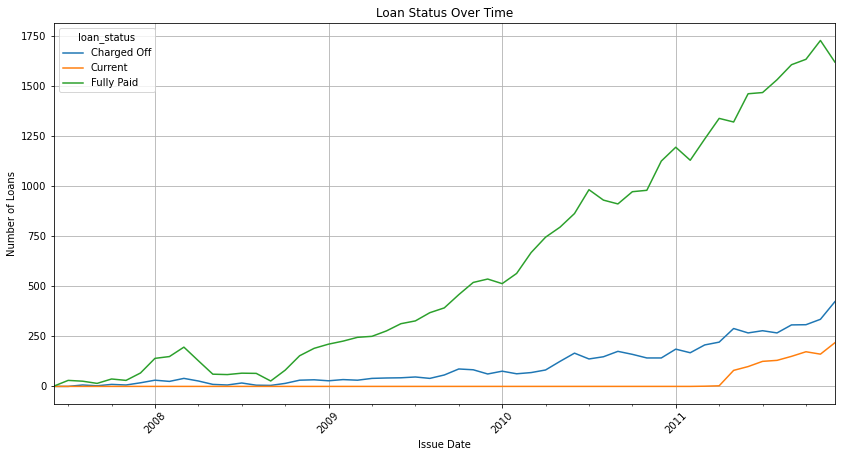

In [78]:
# Create a time series plot of loan status counts over time
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')  # Ensure datetime conversion
df.set_index('issue_d', inplace=True)  # Set issue date as index

# Group by issue date and loan status
status_counts = df.groupby([df.index, 'loan_status']).size().unstack(fill_value=0)

# Plot time series
plt.figure(figsize=(14, 7))
status_counts.plot(ax=plt.gca())
plt.title('Loan Status Over Time')
plt.xlabel('Issue Date')
plt.ylabel('Number of Loans')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Insight
During 2008 financial crisis it can be seen that bad loans ratio increased suddenly but after that they started to recover as the market recovered.

## Annual Income - Useful
We will use dti mainly.

**Hypothesis** - there shouldn't be a trend

### Univariate Analysis

C:\Users\Naznin Naznin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

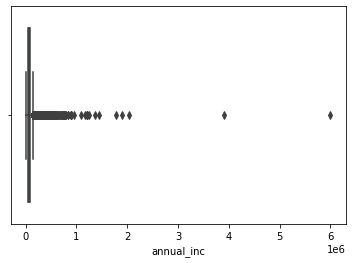

In [79]:
#Box Plot
sns.boxplot(df['annual_inc'])

#### Heavily skewed, verifying on log scale

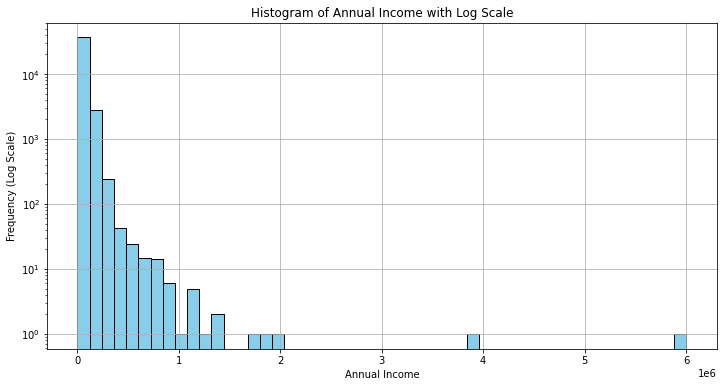

In [80]:
# Plot a histogram with log scale for annual income
plt.figure(figsize=(12, 6))
plt.hist(df['annual_inc'], bins=50, color='skyblue', edgecolor='black')
plt.yscale('log')  # Set y-axis to log scale to handle large ranges
plt.title('Histogram of Annual Income with Log Scale')
plt.xlabel('Annual Income')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True)
plt.show()

#### Looks valid, follows power law

In [81]:
df['annual_inc']

issue_d
2011-12-01     24000.0
2011-12-01     30000.0
2011-12-01     12252.0
2011-12-01     49200.0
2011-12-01     80000.0
                ...   
2007-07-01    110000.0
2007-07-01     18000.0
2007-07-01    100000.0
2007-07-01    200000.0
2007-06-01     22000.0
Name: annual_inc, Length: 39717, dtype: float64

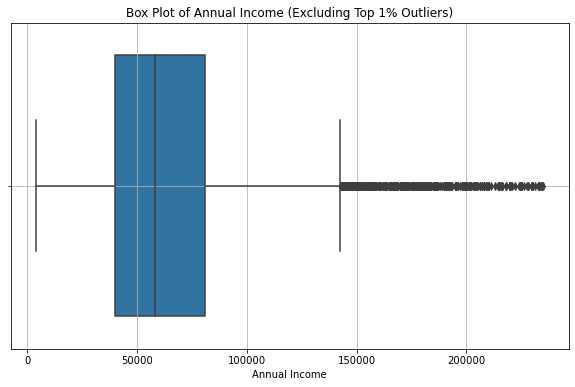

In [82]:
# Remove extreme outliers by filtering values below the 99th percentile
filtered_df = df[df['annual_inc'] < df['annual_inc'].quantile(0.99)]

# Plot boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['annual_inc'])
plt.title('Box Plot of Annual Income (Excluding Top 1% Outliers)')
plt.xlabel('Annual Income')
plt.grid(True)
plt.show()


### Bivariate Analysis


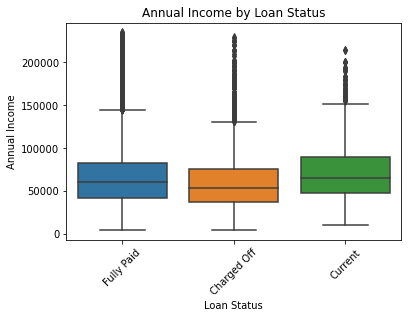

In [83]:
# Create a boxplot to compare dti across different loan statuses
sns.boxplot(data=filtered_df, x='loan_status', y='annual_inc')
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()

### Insights
Higher income people are more likely to repay than lower income. Probability increases around 60000.


### Bivariate Analysis

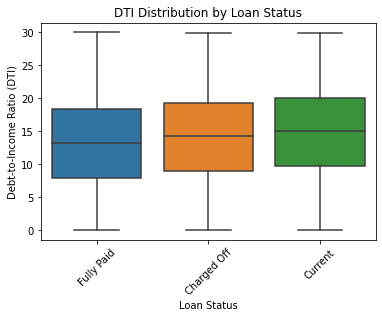

In [84]:
# Create a boxplot to compare dti across different loan statuses
sns.boxplot(data=df, x='loan_status', y='dti')
plt.title('DTI Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.xticks(rotation=45)
plt.show()

### Insights
At around 0.14 DTI the charge off probability increases.

## Interest Rate - Useful

### Data Manipulation
Converting if interest column to numerical but first checking if any value is na after converstion and why. No value was null so converting whole column to numerical and replacing it.

In [86]:
df['int_rate_num'] = pd.to_numeric(df['int_rate'].str.replace('%', ''), errors='coerce')
na_values = df[df['int_rate_num'].isna()] 
display(na_values)

df['int_rate'] = df['int_rate_num']
df['int_rate'].info

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_num
issue_d,,,,,,,,,,,,,,,,,,,,,


<bound method Series.info of issue_d
2011-12-01    10.65
2011-12-01    15.27
2011-12-01    15.96
2011-12-01    13.49
2011-12-01    12.69
              ...  
2007-07-01     8.07
2007-07-01    10.28
2007-07-01     8.07
2007-07-01     7.43
2007-06-01    13.75
Name: int_rate, Length: 39717, dtype: float64>

### Univariate Analysis

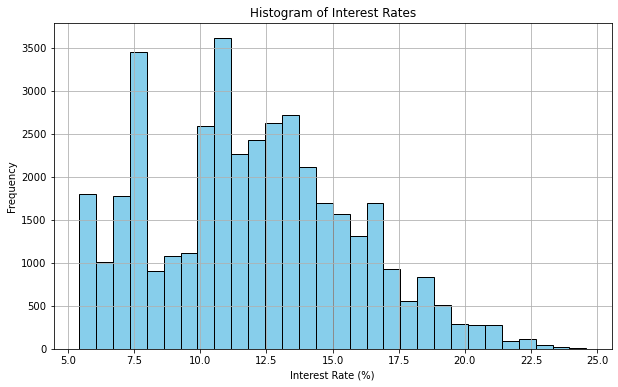

In [87]:
# Plot a histogram of the interest rates
plt.figure(figsize=(10, 6))
plt.hist(df['int_rate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Bivariate Analysis
Box plot analysis 

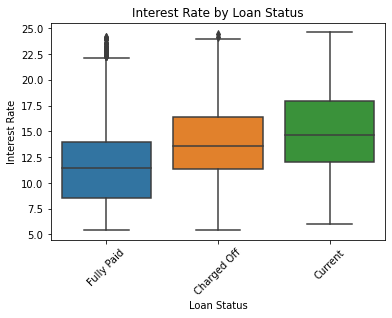

In [88]:
sns.boxplot(data=df, x='loan_status', y='int_rate')
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()

### Insight
At around 13% and above interest defaulting is more probable.

## Number of Open Credit Accounts - Not Useful

The number of open credit lines in the borrower's credit file.

### Univariate Analysis

C:\Users\Naznin Naznin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


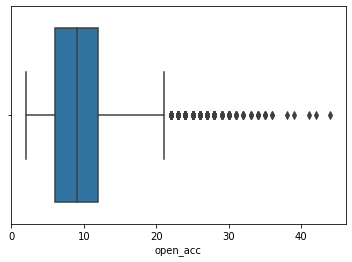

Outlier Validity Check


,id,member_id,funded_amnt,loan_amnt,grade,loan_status,total_acc,open_acc
issue_d,,,,,,,,
2011-12-01,1069971,1304884,3600,3600,A,Fully Paid,42,20
2011-12-01,1066434,1300402,4000,4000,E,Fully Paid,56,30
2011-12-01,1064908,1298959,9000,9000,C,Fully Paid,51,21
2011-12-01,1064146,1298139,4500,4500,C,Fully Paid,34,20
2011-12-01,1063804,1296372,8000,8000,A,Fully Paid,47,18
...,...,...,...,...,...,...,...,...
2007-10-01,143102,143098,3000,3000,C,Fully Paid,29,23
2007-10-01,130735,130725,10250,10250,E,Fully Paid,32,28
2007-09-01,126287,125787,10000,10000,C,Fully Paid,34,18


In [89]:
sns.boxplot(df['open_acc'])
plt.show()
print('Outlier Validity Check')
outliers = df[df['open_acc']>df['open_acc'].quantile(0.95)]
display(outliers[['id','member_id','funded_amnt','loan_amnt', 'grade', 'loan_status','total_acc', 'open_acc']]) ##Outliers are valid

In [90]:
# No null values
df['open_acc'].isna().sum()

0

In [92]:
# not useful, since the top 10 most values are almost similar range, not much variation in data
df['open_acc'].value_counts()

7     4018
6     3946
8     3936
9     3718
10    3223
5     3183
11    2746
4     2343
12    2273
13    1911
3     1493
14    1487
15    1177
16     940
17     741
2      605
18     533
19     396
20     289
21     244
22     143
23      97
24      81
25      55
26      34
28      25
27      22
30      15
29      13
31       7
34       5
32       4
35       4
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: open_acc, dtype: int64

### Bivariate Analysis

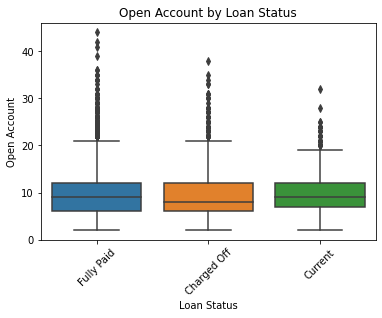

In [93]:
sns.boxplot(data=df, x='loan_status', y='open_acc')
plt.title('Open Account by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Open Account')
plt.xticks(rotation=45)
plt.show()

### Insight
No significant trend is seen

C:\Users\Naznin Naznin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


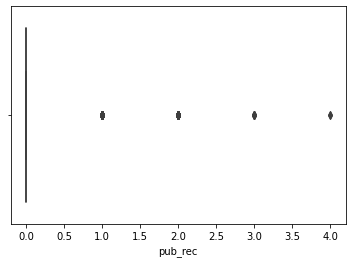

Outlier Validity Check


0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [94]:
sns.boxplot(df['pub_rec'])
plt.show()
print('Outlier Validity Check')
display(df['pub_rec'].value_counts())

#### total_acc analysis

C:\Users\Naznin Naznin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


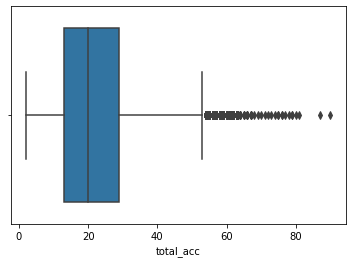

Outlier Validity Check


In [95]:
sns.boxplot(df['total_acc'])
plt.show()

print('Outlier Validity Check')

In [96]:
#### Public record Bankruptsy
df['pub_rec_bankruptcies'].value_counts()

#### Many with 1 bankrupsty, some with 2, no one with more than 3

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

## Revolving Balance - Not Useful

### Univariate Analysis

C:\Users\Naznin Naznin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revol_bal'>

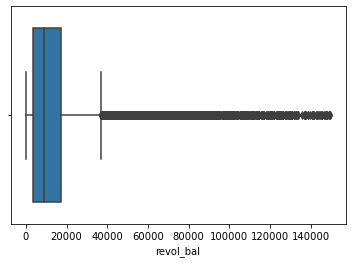

In [97]:
# Box Plot analysis
sns.boxplot(df['revol_bal'])

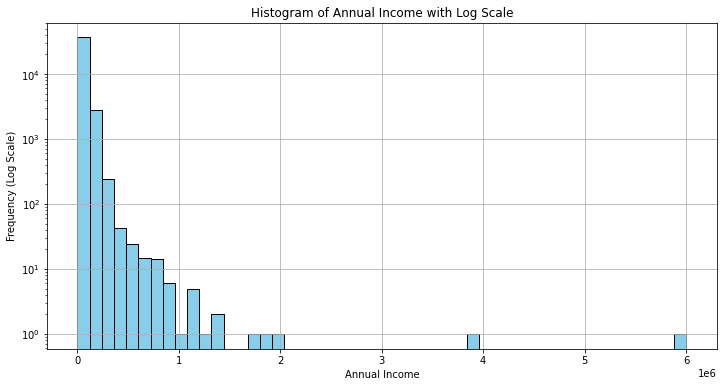

In [98]:
# Plot a histogram with log scale for annual income
plt.figure(figsize=(12, 6))
plt.hist(df['annual_inc'], bins=50, color='skyblue', edgecolor='black')
plt.yscale('log')  # Set y-axis to log scale to handle large ranges
plt.title('Histogram of Annual Income with Log Scale')
plt.xlabel('Annual Income')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True)
plt.show()

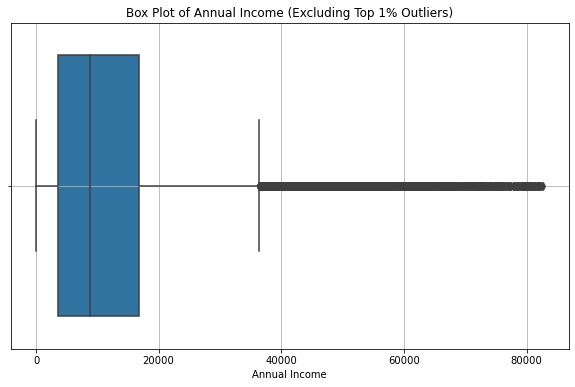

In [99]:
# Remove extreme outliers by filtering values below the 99th percentile
filtered_df = df[df['revol_bal'] < df['revol_bal'].quantile(0.99)]

# Plot boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['revol_bal'])
plt.title('Box Plot of Annual Income (Excluding Top 1% Outliers)')
plt.xlabel('Annual Income')
plt.grid(True)
plt.show()

### Bivariate Analysis

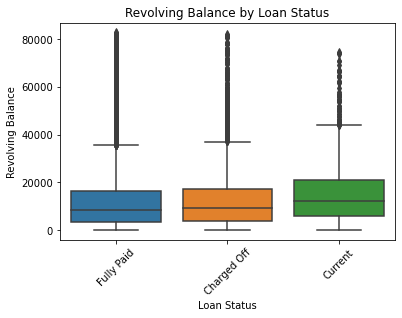

In [100]:
# Create a boxplot to compare dti across different loan statuses
sns.boxplot(data=filtered_df, x='loan_status', y='revol_bal')
plt.title('Revolving Balance by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Balance')
plt.xticks(rotation=45)
plt.show()

### Insight
Not much difference with revolving balance

## Total Credit Account

### Univariate Analysis

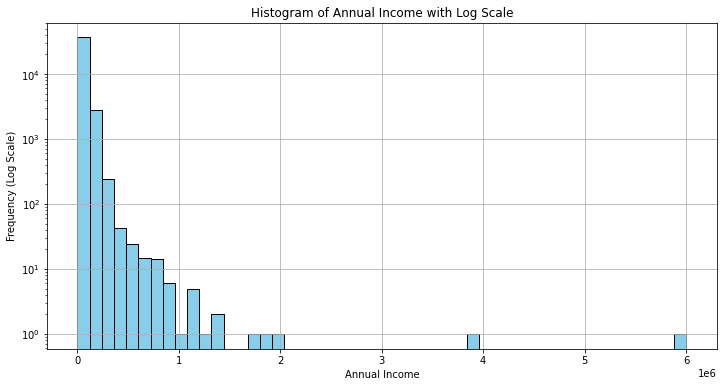

In [101]:
# Plot a histogram with log scale for annual income
plt.figure(figsize=(12, 6))
plt.hist(df['annual_inc'], bins=50, color='skyblue', edgecolor='black')
plt.yscale('log')  # Set y-axis to log scale to handle large ranges
plt.title('Histogram of Annual Income with Log Scale')
plt.xlabel('Annual Income')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True)
plt.show()